﻿In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.


In this capstone, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.


The dataset provided has the following columns of multiple-choice data:

- body_type
- diet
- drinks
- drugs
- education
- ethnicity
- height
- income
- job
- offspring
- orientation
- pets
- religion
- sex
- sign
- smokes
- speaks
- status

And a set of open short-answer responses to :

- essay0 - My self summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at
- essay3 - The first thing people usually notice about me
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about
- essay7 - On a typical Friday night I am
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…


### Introduction


In this capstone, you will create a presentation about your findings in this OkCupid dataset.


The purpose of this capstone is to practice formulating questions and implementing Machine Learning techniques to answer those questions. We will give you guidance about the kinds of questions we asked, and the kinds of methods we used to answer those questions. But the questions you ask and how you answer them are entirely up to you. We're excited to see what kinds of different things you explore.
Compared to the other projects you have completed this far, we are requiring few restrictions on how you structure your code. The project is far more open-ended, and you should use your creativity. In addition, much of the code you write for later parts of this project will depend on how you decided to implement earlier parts. **Therefore, we strongly encourage you to read through the entire assignment before writing any code.**
________________


### Load in the DataFrame


The data is stored in **profiles.csv**. We can start to work with it in **dating.py** by using Pandas, which we have imported for you with the line:


```
import pandas as pd
```


and then loading the csv into a DataFrame: 


```
df = pd.read_csv("profiles.csv")
```

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Create your df here:
df=pd.read_csv("profiles.csv")
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

### Explore the Data


Let's make sure we understand what these columns represent!

Pick some columns and call `.head()` on them to see the first five rows of data. For example, we were curious about `job`, so we called:


```
df.job.head()
```


You can also call `value_counts()` on a column to figure out what possible responses there are, and how many of each response there was.


In [2]:
df.drugs.value_counts()

never        3423
sometimes     916
often          68
Name: drugs, dtype: int64

### Visualize some of the Data


We can start to build graphs from the data by first importing Matplotlib:


```
from matplotlib import pyplot as plt
```


and then making some plots!

For example, we were curious about the distribution of ages on the site, so we made a histogram of the `age` column:


```
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()
```


Try this code in your own file and take a look at the histogram it produces!

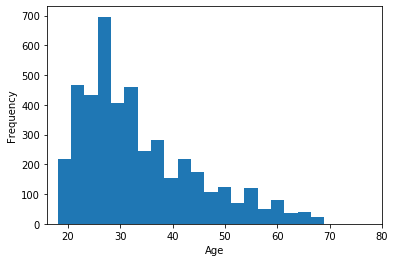

In [3]:
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

### Formulate a Question


As we started to look at this data, we started to get more and more curious about Zodiac signs. First, we looked at all of the possible values for Zodiac signs:


```
df.sign.value_counts()
```


We started to wonder if there was a way to predict a user's Zodiac sign from the information in their profile. Thinking about the columns we had already explored, we thought that maybe we could classify Zodiac signs using drinking, smoking, drugs, and essays as our features.

In [4]:
df.sign.value_counts()

aries and it&rsquo;s fun to think about          186
leo and it&rsquo;s fun to think about            185
gemini and it&rsquo;s fun to think about         182
scorpio and it&rsquo;s fun to think about        178
sagittarius and it&rsquo;s fun to think about    177
gemini but it doesn&rsquo;t matter               177
pisces and it&rsquo;s fun to think about         175
cancer but it doesn&rsquo;t matter               174
virgo and it&rsquo;s fun to think about          173
cancer and it&rsquo;s fun to think about         171
virgo but it doesn&rsquo;t matter                171
libra but it doesn&rsquo;t matter                160
taurus and it&rsquo;s fun to think about         158
libra and it&rsquo;s fun to think about          156
aries but it doesn&rsquo;t matter                154
leo but it doesn&rsquo;t matter                  150
aquarius and it&rsquo;s fun to think about       149
sagittarius but it doesn&rsquo;t matter          147
capricorn but it doesn&rsquo;t matter         

### Augment your Data


In order to answer the question you've formulated, you will probably need to create some new columns in the DataFrame. This is especially true because so much of our data here is categorical (i.e. `diet` consists of the options `vegan`, `vegetarian`, `anything`, etc. instead of numerical values).


Categorical data is great to use as labels, but we want to create some numerical data as well to use for features.


For our question about Zodiac signs, we wanted to transform the `drinks` column into numerical data. We used:


```
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}


all_data["drinks_code"] = all_data.drinks.map(drink_mapping)
```


These lines of code created a new column called 'drinks_code' that mapped the following `drinks` values to these numbers:


| drinks      | drinks_code |
|-------------|-------------|
| not at all  | 0           |
| rarely      | 1           |
| socially    | 2           |
| often       | 3           |
| very often  | 4           |
| desperately | 5           |


We did the same for `smokes` and `drugs`.


We also wanted some numerical data about the short answer essays. We combined them all into one string, took out the `NaN`s, and then created a new column called `essay_len`:


```
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]


# Removing the NaNs
all_essays = all_data[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)


all_data["essay_len"] = all_essays.apply(lambda x: len(x)))
```


We also created a column with average word length and a column with the frequency of the words "I" or "me" appearing in the essays.

In [5]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df["drinks_code"] = df.drinks.map(drink_mapping)
smoke_mapping = {"no": 0, "when drinking": 1, "sometimes": 2, "trying to quit": 3, "yes": 4}
df["smokes_code"] = df.smokes.map(smoke_mapping)
drug_mapping = {"never": 0, "sometimes": 1, "often": 2}
df["drugs_code"] = df.drugs.map(drug_mapping)

df.drugs_code.head()

0     0
19    0
22    0
94    1
98    1
Name: drugs_code, dtype: int64

In [6]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]
# Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)

# Combining the essays
all_essays = df[essay_cols].apply(lambda x: ' '.join(x), axis=1)

df["essay_len"] = all_essays.apply(lambda x: len(x))

def avg_word_len(text):
    all_words_len=0
    for word in text.split(" "):
        all_words_len+=len(word)
    return all_words_len/len(text.split(" "))
df["avg_word_len"] = all_essays.apply(lambda x: avg_word_len(x))

def i_me_frequency(text):
    i_me_freq=0
    for word in text.split(" "):
        if word=="I" or word=="me":
            i_me_freq+=1
        else:
            continue
    return i_me_freq
df["i_me_frequency"] = all_essays.apply(lambda x: i_me_frequency(x))
df.i_me_frequency.head()

0     5
19    2
22    0
94    3
98    0
Name: i_me_frequency, dtype: int64

### Normalize your Data!


In order to get accurate results, we should make sure our numerical data all has the same weight.


For our Zodiac features, we used:


```
feature_data = all_data[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_length']]


x = feature_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)


feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)
```

In [7]:
from sklearn.preprocessing import MinMaxScaler
feature_data = df[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_len', 'i_me_frequency']]


x = feature_data.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)


feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)
feature_data.head()

,smokes_code,drinks_code,drugs_code,essay_len,avg_word_len,i_me_frequency
0,0.5,0.4,0.0,0.026107,0.113183,0.172414
1,0.0,0.4,0.0,0.027542,0.133425,0.068966
2,0.0,0.4,0.0,0.020261,0.113948,0.000000
3,0.0,0.4,0.5,0.009538,0.110875,0.103448
4,0.0,0.4,0.5,0.007832,0.147957,0.000000


### Use Classification Techniques


We have learned how to perform classification in a few different ways.


- We learned about K-Nearest Neighbors by exploring IMDB ratings of popular movies 
- We learned about Support Vector Machines by exploring baseball statistics
- We learned about Naive Bayes by exploring Amazon Reviews


Some questions we used classification to tackle were:


- Can we predict sex with education level and income??
- Can we predict education level with essay text word counts?

#### Predict Sex with education level and income

In [8]:
df = df.replace(np.nan, '', regex=True)
data = df[["education", "income"]]
feature_data=data["income"].map(str)+" "+data["education"].map(str)
feature_data=feature_data.tolist()
labels=df["sex"].tolist()
print(feature_data)

['-1 working on college/university', '-1 graduated from masters program', '-1 graduated from college/university', '40000 graduated from college/university', '-1 graduated from masters program', '-1 graduated from masters program', '20000 working on college/university', '-1 graduated from two-year college', '1000000 working on space camp', '80000 college/university', '20000 working on college/university', '70000 graduated from college/university', '-1 graduated from college/university', '50000 graduated from college/university', '-1 graduated from masters program', '-1 graduated from college/university', '-1 working on ph.d program', '-1 graduated from college/university', '-1 graduated from masters program', '-1 working on space camp', '30000 graduated from college/university', '60000 graduated from two-year college', '-1 two-year college', '80000 graduated from masters program', '80000 graduated from college/university', '-1 graduated from college/university', '50000 graduated from tw

In [9]:
from sklearn.model_selection import train_test_split

# Preparation of the train and test arrays
f_train, f_test, l_train, l_test = train_test_split(feature_data, labels, train_size=0.8, test_size=0.2, random_state = 100)


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer()
counter.fit(f_train)
train_counts = counter.transform(f_train)
test_counts = counter.transform(f_test)

print(f_train[3])
print(train_counts[3])



100000 graduated from college/university
  (0, 0)	1
  (0, 13)	1
  (0, 15)	1
  (0, 16)	1
  (0, 29)	1


In [11]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(train_counts, l_train)
predictions = classifier.predict(test_counts)

In [12]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


#recall=recall_score(l_test, predictions)
#precision=precision_score(l_test, predictions)
#f1=f1_score(l_test, predictions)
accuracy=accuracy_score(l_test, predictions)

print(accuracy)

0.5873015873015873


#### Predict education with essey text counts

In [13]:
feature_data = df["essay_len"].tolist()
labels=df["education"].tolist()
print(labels)

['working on college/university', 'graduated from masters program', 'graduated from college/university', 'graduated from college/university', 'graduated from masters program', 'graduated from masters program', 'working on college/university', 'graduated from two-year college', 'working on space camp', 'college/university', 'working on college/university', 'graduated from college/university', 'graduated from college/university', 'graduated from college/university', 'graduated from masters program', 'graduated from college/university', 'working on ph.d program', 'graduated from college/university', 'graduated from masters program', 'working on space camp', 'graduated from college/university', 'graduated from two-year college', 'two-year college', 'graduated from masters program', 'graduated from college/university', 'graduated from college/university', 'graduated from two-year college', 'dropped out of college/university', 'graduated from college/university', 'graduated from college/univ

In [14]:
from sklearn.model_selection import train_test_split

# Preparation of the train and test arrays
f_train, f_test, l_train, l_test = train_test_split(feature_data, labels, train_size=0.8, test_size=0.2, random_state = 100)


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

counter = CountVectorizer()
counter.fit(f_train)
train_counts = counter.transform(f_train)
test_counts = counter.transform(f_test)

print(f_train[3])
print(train_counts[3])



AttributeError: 'int' object has no attribute 'lower'

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(train_counts, l_train)
predictions = classifier.predict(test_counts)

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(l_test, predictions))

### Use Regression Techniques


We have learned how to perform Multiple Linear Regression by playing with StreetEasy apartment data. Is there a way we can apply the techniques we learned to this dataset?


Some questions we used regression to tackle were:


- Predict income with length of essays and average word length?
- Predict age with the frequency of "I" or "me" in essays?


We also learned about K-Nearest Neighbors Regression. Which form of regression works better to answer your question?

In [ ]:
plt.scatter(df["essay_len"], df["income"], alpha=0.5)

In [ ]:
plt.scatter(df["avg_word_len"], df["income"], alpha=0.5)

In [ ]:
print(df.avg_word_len)

In [ ]:
plt.scatter(df["age"], df["i_me_frequency"], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Frequency")

In [ ]:
from sklearn.linear_model import LinearRegression
features=df[["essay_len", "avg_word_len"]]
labels=df.income

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 1)

model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
features=df[["i_me_frequency"]]
labels=df.age

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 1)

model = LinearRegression()
model.fit(X_train,y_train)

model.score(X_test,y_test)

In [ ]:
guesses=model.predict(X_test)
labels=y_test.map(float)
print(guesses)

### Analyze the Accuracy, Precision and Recall


After you have trained your model and run it, you will probably be curious about how well it did.


Find the accuracy, precision, and recall of each model you used, and create graphs showing how they changed.


For our question of classifying Zodiac signs, one graph we produced showed classification accuracy versus `k` (for K-Nearest Neighbors):
![accuracy vs k](https://s3.amazonaws.com/codecademy-content/programs/machine-learning/capstone/Zodiac_Accuracy.png)


The accuracy we would expect from predicting a Zodiac sign by randomly selecting one would be 1/12, or 0.0833. Our model did not significantly outperform this number. We were unimpressed.


### Create your Presentation


We want to see:


- at least two graphs containing exploration of the dataset
- a statement of your question (or questions!) and how you arrived there 
- the explanation of at least two new columns you created and how you did it
- the comparison between two classification approaches, including a qualitative discussion of simplicity, time to run the model, and accuracy, precision, and/or recall
- the comparison between two regression approaches, including a qualitative discussion of simplicity, time to run the model, and accuracy, precision, and/or recall
- an overall conclusion, with a preliminary answer to your initial question(s), next steps, and what other data you would like to have in order to better answer your question(s)


Good luck!